## **Ted Talk Views Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website.
As we have a continous variable to predict, we use regression models to predict the views of the TED talks.


##**<u>Steps to follow:</u>**
##**1)Data loading**
##**2)Data Cleaning**
##**3)EDA**
##**4)Feature engineering** 
##**5)Model buliding**
##**6)Evaluation of models**



In [ ]:
  # Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the data**

In [ ]:
#Importing the dataset

#tedtalk_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone 2/data_ted_talks.csv')

tedtalk_df = pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [ ]:
tedtalk_df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
tedtalk_df.shape

(4005, 19)

We can observe that we have 4005 rows of data a=with 19 variables. Before starting with the EDA, we need to clean the data.

##**Data Cleaning**

In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




,Missing Values,% of Total Values,Data Type
comments,655,16.4,float64
occupations,522,13.0,object
about_speakers,503,12.6,object
all_speakers,4,0.1,object
recorded_date,1,0.0,object
talk_id,0,0.0,int64
description,0,0.0,object
url,0,0.0,object
related_talks,0,0.0,object
topics,0,0.0,object


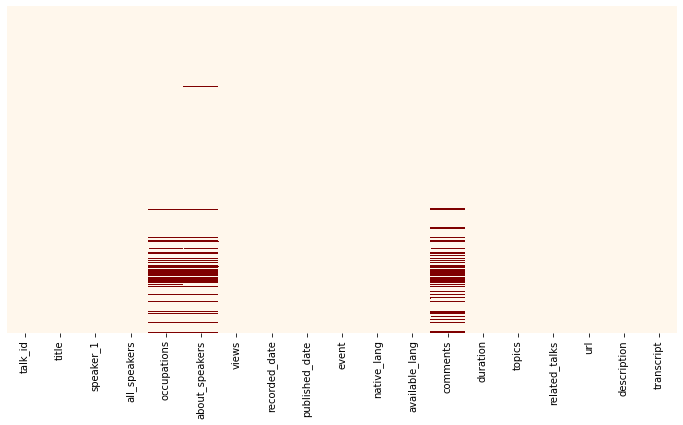

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [ ]:
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.


Here, some of the missing values are treated which missing value % was very less. Its done beacuse it will give better visualizations in our EDA.

In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance.

In [ ]:
tedtalk_df.info()
#Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date, month and year columns are converted to its proper Datetime datatype.

In [ ]:
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')
#converting the published and recorded date as datetime datatype

In [ ]:
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)
#finding out the respected day,month and year

In [ ]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)
#again converting the month which was in numbers to exact month names

In [ ]:
tedtalk_df.head(2)

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,release_day,release_month,release_year
0,Averting the climate crisis,Al Gore,[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,The best stats you've ever seen,Hans Rosling,[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


In [ ]:
ted_talk_df = tedtalk_df.copy()

In [ ]:
tedtalk_df.head(2)

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,release_day,release_month,release_year
0,Averting the climate crisis,Al Gore,[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,The best stats you've ever seen,Hans Rosling,[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


Now that a basic level cleaning of dataset is done we will start with the process of EDA

#**EDA**

# **Speaker_1** **column**

##**Speakers with top 20 total views wrt their number of talks**

In [ ]:
tedtalk_df['speaker_1'].nunique()

3274

In [ ]:
speaker_with_most_talks = pd.DataFrame(tedtalk_df['speaker_1'].value_counts()).reset_index()
speaker_with_most_talks.rename(columns={'index':'speaker_1', 'speaker_1':'num_of_talks'}, inplace=True)


speaker_total_views_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).reset_index()
#speaker with respected total views
speaker_tv_df = speaker_total_views_df.head(20).sort_values('views',ascending=False)

speaker_report = speaker_with_most_talks.merge(speaker_total_views_df,on='speaker_1').reset_index()



In [ ]:
#taking only numeric columns to do the minmaxscaling
speaker_numeric = speaker_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(speaker_numeric)
#print(scaled)
speaker_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
speaker_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
speaker_report = speaker_report.head(20)

Text(0.5, 1.0, 'Speaker with top 10 total views and number_of_talks')

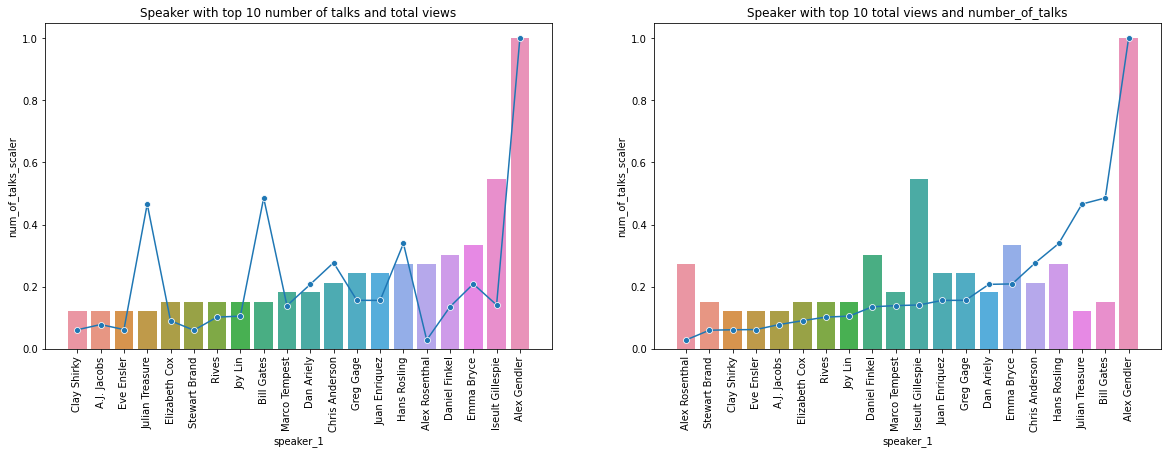

In [ ]:
# graph for speakers which has maximum talks with respect to views

# # plotting the graph

speaker_report_1 = speaker_report.sort_values('num_of_talks_scaler')
speaker_report_2 = speaker_report.sort_values('views')
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_1)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_1,marker='o')
plt.title('Speaker with top 10 number of talks and total views')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_2)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_2,marker='o')
plt.title('Speaker with top 10 total views and number_of_talks')
#speaker_report


We have the visualization for the same data from two different aspect here.


(1) First is the graph which contains Speakers who had given most number of talks. And the line graph represents their Views. 
We can observe that Bill Gates was the influenced person, so even if his number of talks are less, he has received more number of views. So the speaker influences the number of views fo the talks.We ca see some hike in the graoh for the influenced speakers.

(2) Second is the graph which is sorted according to the Number of views talks received. We can observe that the number of talks is not directly contributing to the number of views talks can receive. 




## **Speaker who received more number of views for one video.**

In [ ]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


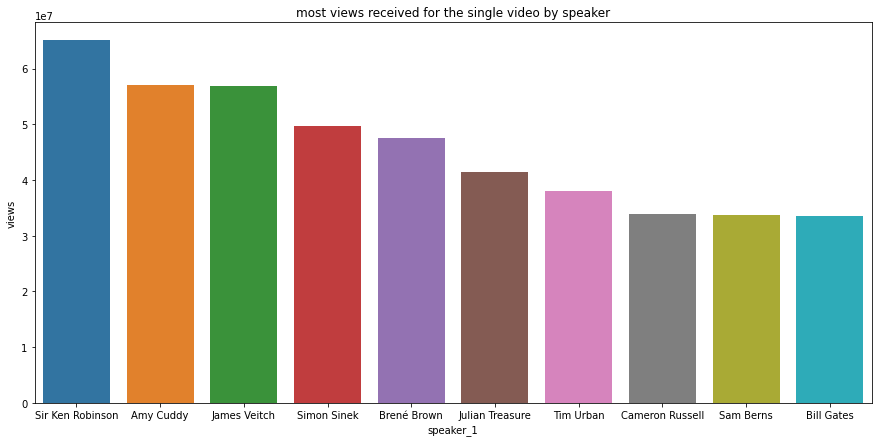

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most views received for the single video by speaker")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

This graph represents the maximum views a single video received. Sir Ken Robinson is the one who received maximum number of views for a single video.

#**Occupations column**

## **Top occupations of the speaker**

In [ ]:

tedtalk_df['speaker_occupation']=pd.Series()
for i in range(len(tedtalk_df)):
  tedtalk_df.loc[i,'speaker_occupation'] = tedtalk_df['occupations'][i][0]

In [ ]:
tedtalk_df['speaker_occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                   other
4002                          law researcher
4003                                   other
4004                                   other
Name: speaker_occupation, Length: 4005, dtype: object

In [ ]:
tedtalk_df.drop('occupations',axis=1,inplace=True)

In [ ]:
tedtalk_df['speaker_occupation'].nunique()

1552

We can observe that there are 1552 different occupations for the respective speakers in TED talk videos

In [ ]:
speaker_occupations_df = pd.DataFrame(tedtalk_df['speaker_occupation'].value_counts()).reset_index()
speaker_occupations_df.rename(columns={'index':'Occupations', 'speaker_occupation':'Number_of_speakers'}, inplace=True)

occupations_with_most_views = tedtalk_df.groupby(['speaker_occupation'],dropna=True)['views'].mean().reset_index()
occupations_with_most_views.rename(columns={'speaker_occupation':'Occupations', 'views':'views'}, inplace=True)

occupation_report = speaker_occupations_df.merge(occupations_with_most_views,on='Occupations')


In [ ]:
#taking only numeric columns to do the minmaxscaling
occupation_numeric = occupation_report[['Number_of_speakers','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(occupation_numeric)
#print(scaled)
occupation_report ['Number_of_speakers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
occupation_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Occupations with average views and respected number of speakers')

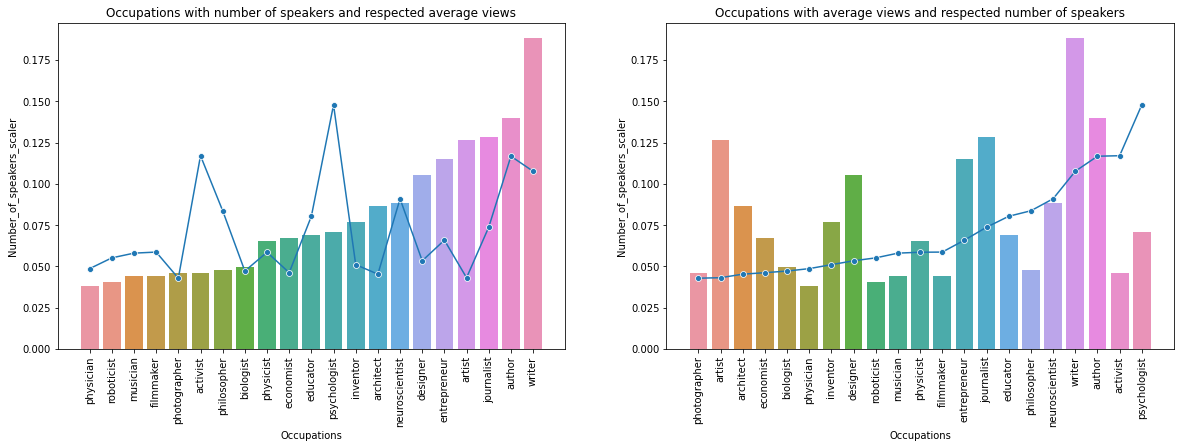

In [ ]:
# graph for occupation which has maximum talks with respect to views

# # plotting the graph

occupation_report_1 = occupation_report.sort_values('Number_of_speakers')
occupation_report_2 = occupation_report.sort_values('views')

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_1)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_1,marker='o')
plt.title('Occupations with number of speakers and respected average views')



plt.subplot(1, 2, 2)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_2)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_2,marker='o')
plt.title('Occupations with average views and respected number of speakers')


Again we have 2 representation of the same graphs, once sorted according to the number of talks then according to the number of views.

(1) In first graph, we can see that, again number of talks for the respective occupations are not directly contributing to the number of views. Instead the type of occupations are bringinfg a hike in number of views. For example, psychology (which everybody loves to listen about) and Activist (Who will make everybody listen to them by theri words). The occupations (might be their skills to talk to) does matter in number of views.

(2) Second graph contains the grapph which is sorted according to the number of views. We can See that the top 3 views were received by Psychologist, Activist and Author who all are very good in making people love what they speak.

##**Occupations which received maximum number of views for a a single video.**

In [ ]:

most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_occupation','views','title']]

,speaker_occupation,views,title
4,author,65051954,Do schools kill creativity?
1296,social psychologist,57074270,Your body language may shape who you are
2062,comedian and writer,56932551,This is what happens when you reply to spam email
646,leadership expert,49730580,How great leaders inspire action
796,vulnerability researcher,47544833,The power of vulnerability
1724,sound consultant,41504331,How to speak so that people want to listen
2108,blogger,37976820,Inside the mind of a master procrastinator
1366,model,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,activist,33691484,My philosophy for a happy life
1898,philanthropist,33521780,The next outbreak? We're not ready


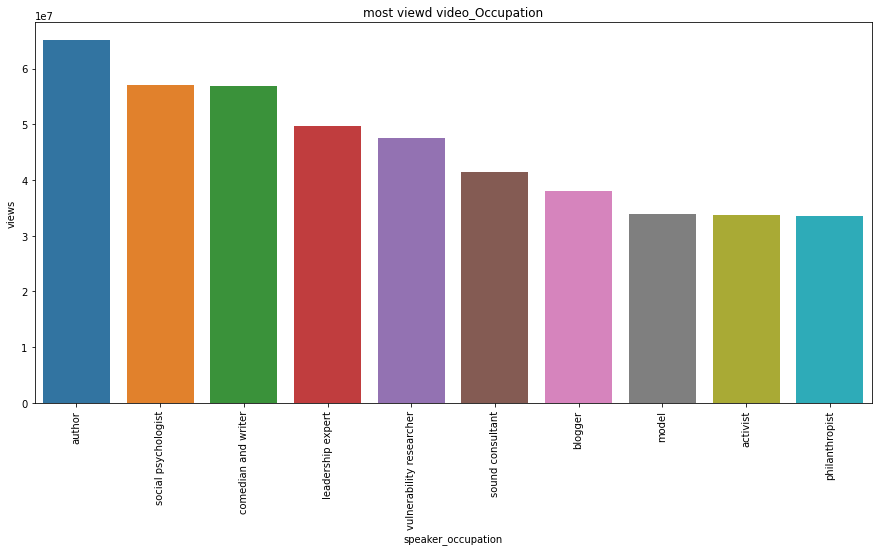

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most viewd video_Occupation")
plt.xticks(rotation=90)
sns.barplot(x='speaker_occupation',y='views',data=most_popular_video_df)

We can observe that the maximum number of views for a single video was received by the occuapttions Author followed by Psychologist.

#**Published date and released date**

##**Finding out on which day most of the videos were released**

In [ ]:
#creating a df which holds the number of talks on each day
talk_rel_day_df = pd.DataFrame(tedtalk_df['release_day'].value_counts()).reset_index()
talk_rel_day_df.rename(columns={'index':'release_day', 'release_day':'num_of_talks'}, inplace=True)

#creating another df which holds the record of views on each day
popular_day = tedtalk_df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

#merging both df
talk_day_report = talk_rel_day_df.merge(popular_day,on='release_day')

talk_day_report

,release_day,num_of_talks,views
0,Tuesday,857,2.025352e+06
1,Thursday,832,1.907994e+06
2,Friday,789,2.693812e+06
3,Monday,727,1.953866e+06
4,Wednesday,703,2.293402e+06
5,Sunday,55,1.458068e+06
6,Saturday,42,9.821678e+05


In [ ]:
#Sorting the days by using another dataframe with the day values

day_value = pd.DataFrame([['Sunday',0],['Monday',1],['Tuesday',2],['Wednesday',3],['Thursday',4],['Friday',5],['Saturday',6]])
day_value.rename(columns={0:'release_day',1:'Day_value'},inplace=True)
day_value
talk_day_report = talk_day_report.merge(day_value,on='release_day')

talk_day_report

,release_day,num_of_talks,views,Day_value
0,Tuesday,857,2.025352e+06,2
1,Thursday,832,1.907994e+06,4
2,Friday,789,2.693812e+06,5
3,Monday,727,1.953866e+06,1
4,Wednesday,703,2.293402e+06,3
5,Sunday,55,1.458068e+06,0
6,Saturday,42,9.821678e+05,6


In [ ]:
talk_day_report = talk_day_report.sort_values('Day_value',ascending=True)
talk_day_report = talk_day_report.drop('Day_value',axis=True)
talk_day_report

,release_day,num_of_talks,views
5,Sunday,55,1.458068e+06
3,Monday,727,1.953866e+06
0,Tuesday,857,2.025352e+06
4,Wednesday,703,2.293402e+06
1,Thursday,832,1.907994e+06
2,Friday,789,2.693812e+06
6,Saturday,42,9.821678e+05


In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_day_numeric = talk_day_report[['num_of_talks','views']]
print(talk_day_numeric)
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_day_numeric)
#print(scaled)
talk_day_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_day_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

   num_of_talks         views
5            55  1.458068e+06
3           727  1.953866e+06
0           857  2.025352e+06
4           703  2.293402e+06
1           832  1.907994e+06
2           789  2.693812e+06
6            42  9.821678e+05


In [ ]:
talk_day_report

,release_day,num_of_talks,views,num_of_talks_scaler,views_scaler
5,Sunday,55,1.458068e+06,0.916564,1.000000
3,Monday,727,1.953866e+06,0.811043,0.766067
0,Tuesday,857,2.025352e+06,0.015951,0.278037
4,Wednesday,703,2.293402e+06,0.969325,0.540899
1,Thursday,832,1.907994e+06,0.840491,0.567699
2,Friday,789,2.693812e+06,1.000000,0.609463
6,Saturday,42,9.821678e+05,0.000000,0.000000


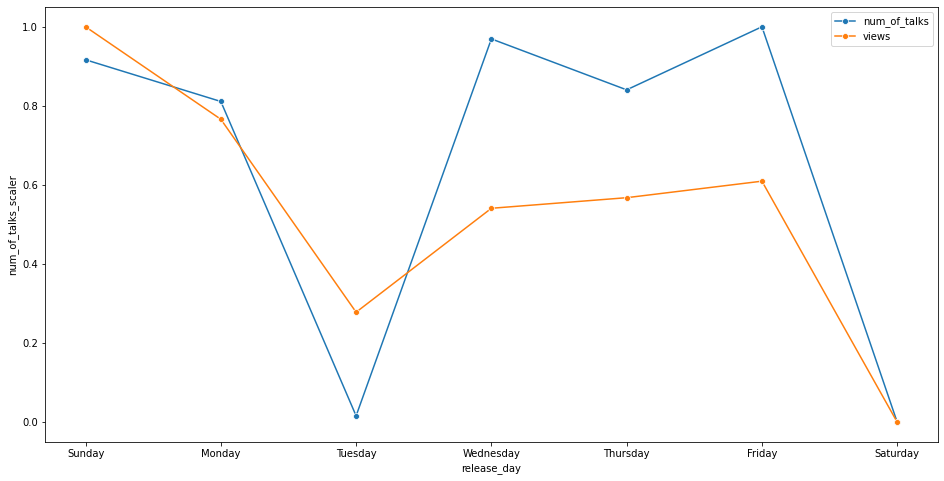

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_day_report.iloc[:,3:]:
  sns.lineplot(data=talk_day_report,x='release_day',y=i,marker='o')

plt.legend(labels=talk_day_numeric)

We can observe in this graph about the comparision of number of talks and as well as the number of views a particular day received. We can see that on saturday the number of talks and as well as the number of views were low. And on Sunday, Wednesday and Friday the release were high. But the number of views were high only on Sunday.

It may seem that only on weekends people were interested to give a time for TED talk videos.

## **Month**

In [ ]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [ ]:
# creating data frame for num of talks in a particular month 
talk_rel_month_df = pd.DataFrame(tedtalk_df['release_month'].value_counts()).reset_index()
talk_rel_month_df.rename(columns={'index':'release_month', 'release_month':'num_of_talks'}, inplace=True)

#Printing the most popular release month according to average Views
popular_month = tedtalk_df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'}).sort_values('release_month').reset_index()

#merging two dataframes which has number of talks and views received in the same df
talk_month_report = talk_rel_month_df.merge(popular_month,on='release_month')

#sorting according to month in here
talk_month_report = Sort_Dataframeby_Month(df=talk_month_report ,monthcolumnname='release_month')



In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_month_numeric = talk_month_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_month_numeric)
#print(scaled)
talk_month_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_month_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:

talk_month_report

,release_month,num_of_talks,views,num_of_talks_scaler,views_scaler
0,Jan,348,2.014319e+06,0.598930,0.298644
1,Feb,412,2.135949e+06,0.941176,0.434075
2,March,419,2.644200e+06,0.978610,1.000000
3,April,423,2.180815e+06,1.000000,0.484033
4,May,312,2.449977e+06,0.406417,0.783738
5,June,310,2.125505e+06,0.395722,0.422446
6,July,278,2.127899e+06,0.224599,0.425112
7,Aug,236,1.884180e+06,0.000000,0.153737
8,Sep,347,2.224862e+06,0.593583,0.533078
9,Oct,350,1.909282e+06,0.609626,0.181687


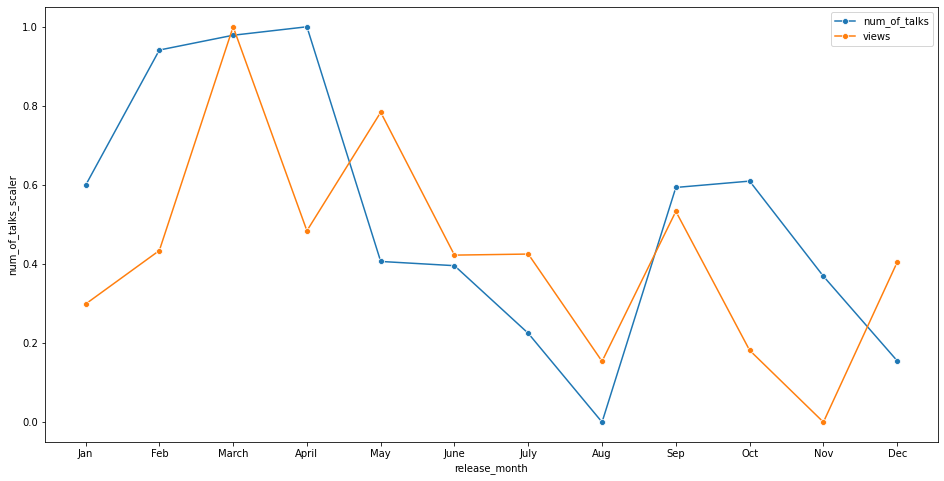

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_month_report.iloc[:,3:]:
  sns.lineplot(data=talk_month_report,x='release_month',y=i,marker='o')

plt.legend(talk_month_numeric)

Here we can observe that it has the comparision wise line graph for number of talks and number of views for the respective month.

Most number of videos wwere released on the month of April where the lease was released on the month of August. But the number of views were maximum for the videos which were released on the minth of March and it was lease for the videos of November.



##**Year**

In [ ]:
talk_rel_year_df = pd.DataFrame(tedtalk_df['release_year'].value_counts()).reset_index()
talk_rel_year_df.rename(columns={'index':'release_year', 'release_year':'num_of_talks'}, inplace=True)

popular_year = tedtalk_df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'}).sort_values('release_year',ascending=False).reset_index()

talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')


In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_year_numeric = talk_year_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_year_numeric)
#print(scaled)
talk_year_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_year_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:
talk_year_report

,release_year,num_of_talks,views,num_of_talks_scaler,views_scaler
14,2006,49,4.937003e+06,0.248086,0.000000
13,2007,119,1.848977e+06,1.000000,0.252568
12,2008,185,1.810979e+06,0.655436,0.224291
10,2009,215,2.071610e+06,0.295559,0.450839
8,2010,230,2.188767e+06,0.292496,0.373247
4,2011,255,1.932456e+06,0.277182,0.314698
3,2012,303,2.196281e+06,0.254211,0.285484
5,2013,242,3.012435e+06,0.315467,0.250785
7,2014,240,2.423564e+06,0.295559,0.520089
9,2015,220,2.806775e+06,0.261868,0.468805


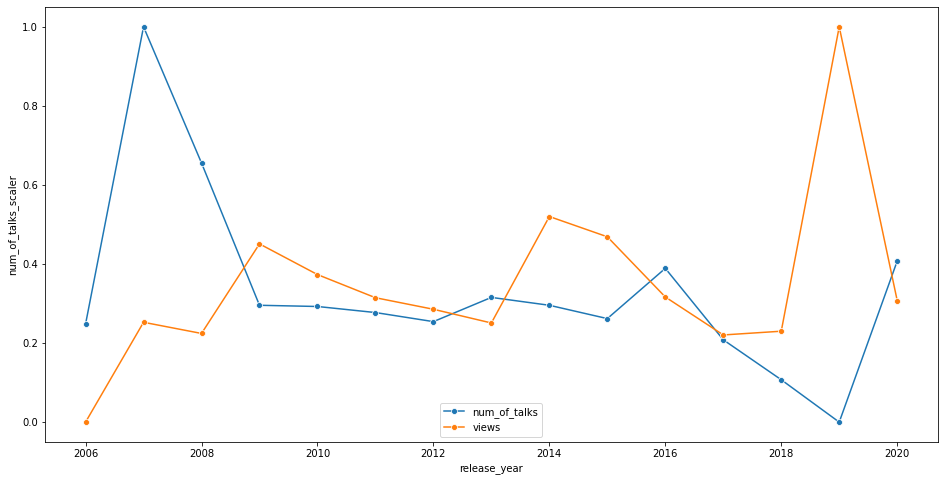

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_year_report.iloc[:,3:]:
  sns.lineplot(data=talk_year_report,x='release_year',y=i,marker='o')
plt.legend(labels=talk_year_numeric)

We can observe the line graph for almost 20 years of number of talks and number of views. We can conclude that Number of talks were morein old days but eventually it was reduced hit the minimum in 2019. It hits the hike in 2007 though. But the number of views were gradually increasing from year to year with a little bit of ups and downs. It was high during the 2019 when the number of talks were minimum.

##**To view the number of views received per day on monthly basis**

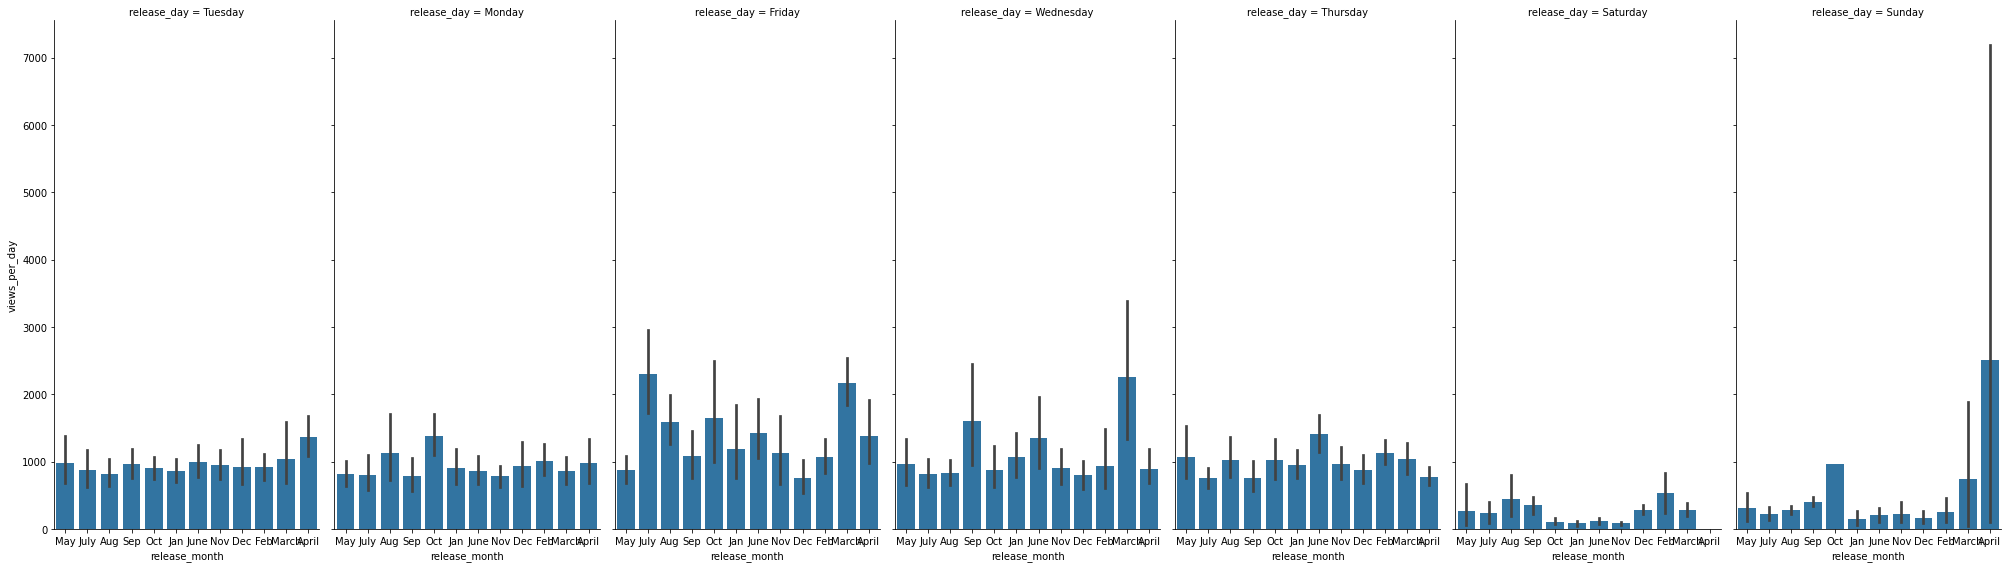

In [ ]:
from datetime import date
graph_df = tedtalk_df.copy()
g = sns.FacetGrid(graph_df, col='release_day', height=8, aspect=.5)
td = pd.to_datetime(date.today(), format='%Y-%m-%d')
graph_df['video_age'] = (td - tedtalk_df['published_date']).apply(lambda x: x.days)
graph_df['views_per_day'] = graph_df['views'] / ( graph_df['video_age'] + 1 )
g.map(sns.barplot, 'release_month', 'views_per_day')


#**Comment and duration columns**

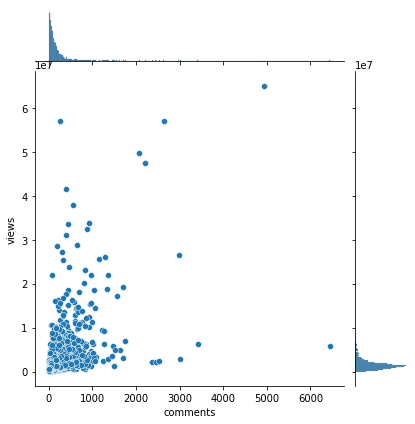

In [ ]:
sns.jointplot(data=tedtalk_df,x='comments', y='views')

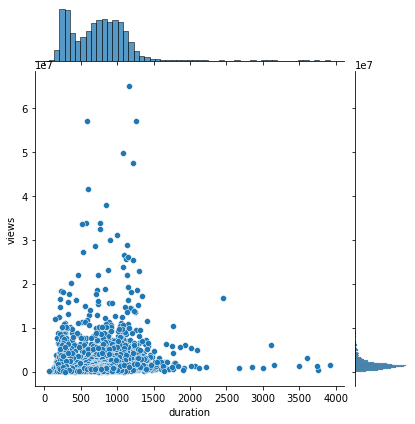

In [ ]:
sns.jointplot(data=tedtalk_df,x='duration', y='views')

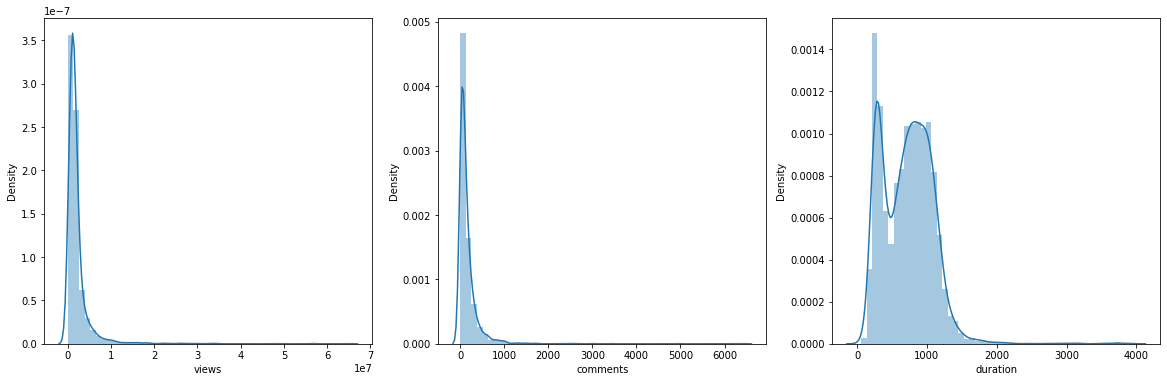

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(tedtalk_df['views'])
plt.subplot(1,3,2)
sns.distplot(tedtalk_df['comments'])
plt.subplot(1,3,3)
sns.distplot(tedtalk_df['duration'])


We can observe the data distribution of the nukmerical columns views , comments and duration.

## **Events with respect to talks and views**

In [ ]:
#count of events

event_count_df = pd.DataFrame(tedtalk_df['event'].value_counts()).reset_index()
event_count_df.rename(columns={'index':'event', 'event':'num_of_talks'}, inplace=True)

#event with max views
popular_event=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

event_report = event_count_df.merge(popular_event,on='event')



In [ ]:
#taking only numeric columns to do the minmaxscaling
event_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(event_numeric)
#print(scaled)
event_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
event_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))


Text(0.5, 1.0, 'Events with top 10 views followed by their number of talks')

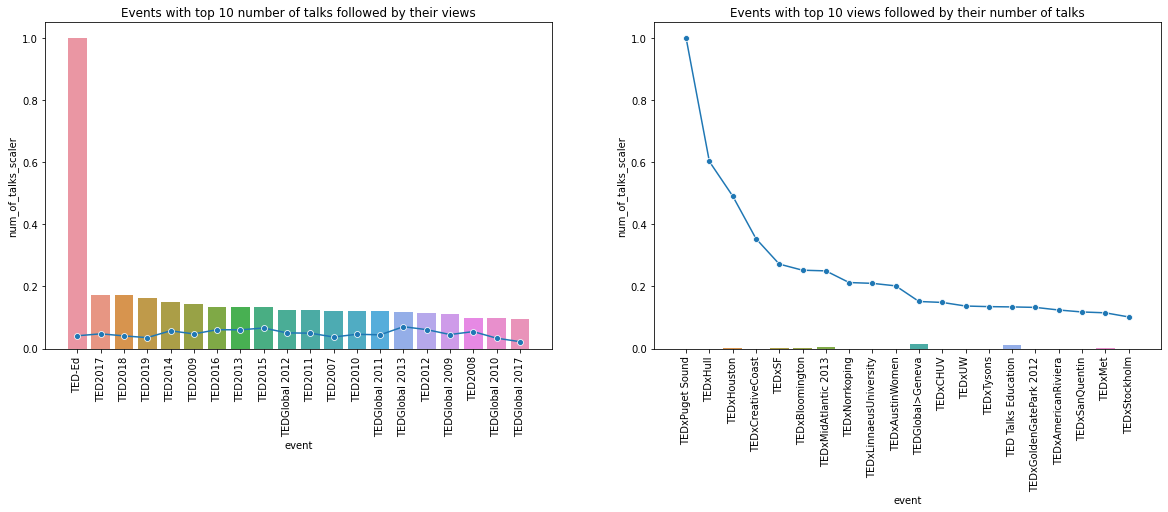

In [ ]:
# graph for event which has maximum talks with respect to views
event_talk_views_report_1 = event_report.sort_values('num_of_talks',ascending=False).head(20)
event_talk_views_report_2 = event_report.sort_values('views',ascending=False).head(20)
# # plotting the graph

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_1)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_1,marker='o')
plt.title('Events with top 10 number of talks followed by their views')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_2)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_2,marker='o')
plt.title('Events with top 10 views followed by their number of talks')


This graph represents the number of views for the different views along with the number of talks. We can observe that the count of number of talks of event did not really matter for views. For top 10 events in the first graph, the number of views is almost the same. And in the second graph, for the top 10 nummber of views, event's number of talks were very low. 

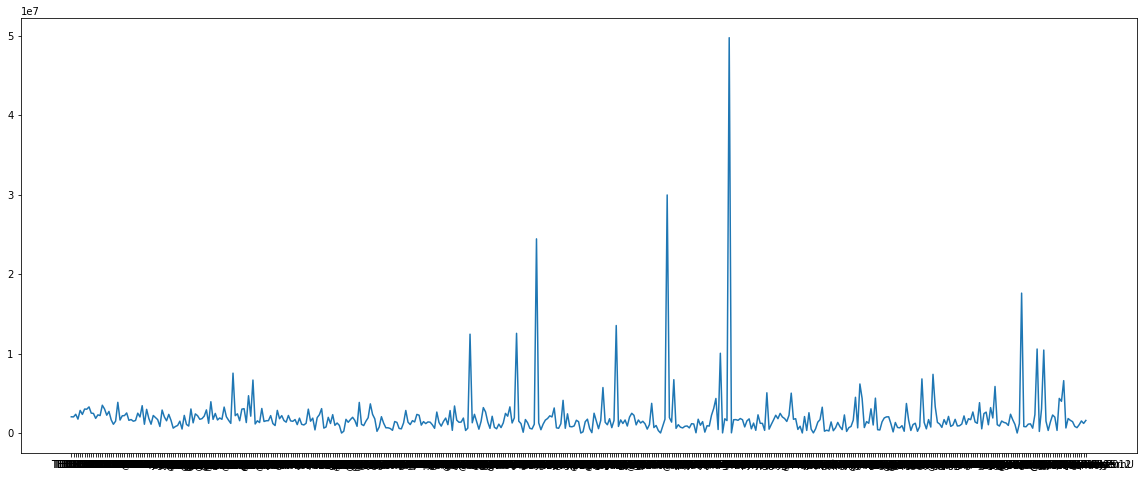

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(event_report['event'],event_report['views'])

This explains about the different events with respect to the number of views. And we can see some hikes in number of views for very few events in here. 

# **Native lang column**

In [ ]:
tedtalk_df['native_lang'].nunique()

12

In [ ]:
native_lang_df = pd.DataFrame(tedtalk_df['native_lang'].value_counts()).reset_index()

native_lang_df.rename(columns={'index':'native_lang', 'native_lang':'num_of_talks'}, inplace=True)

#event with max views
popular_lang=tedtalk_df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

lang_report = native_lang_df.merge(popular_lang,on='native_lang')

In [ ]:
#taking only numeric columns to do the minmaxscaling
lang_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(lang_numeric)
#print(scaled)
lang_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
lang_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

,native_lang,num_of_talks,views,num_of_talks_scaler,views_scaler
0,en,3957,2.163597e+06,1.000000,0.041120
1,es,27,6.898032e+05,0.171171,0.040824
2,fr,9,9.825846e+05,0.171171,0.047425
3,ja,3,6.802843e+05,0.162162,0.035154
4,hi,2,5.768520e+05,0.149550,0.057226
5,de,1,8.848810e+05,0.144144,0.047162
6,pt,1,3.475180e+05,0.133333,0.060661
7,ko,1,2.057706e+06,0.133333,0.060288
8,zh-cn,1,1.368494e+06,0.133333,0.066117
9,ar,1,1.452611e+06,0.124324,0.050363


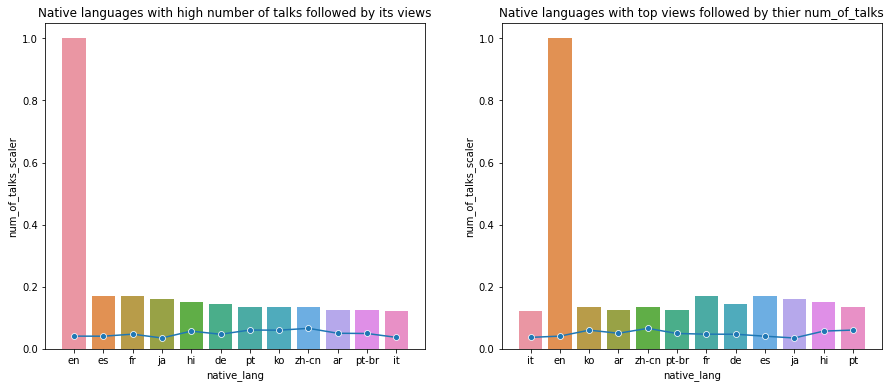

In [ ]:
# graph for langauges which has maximum talks with respect to views
#lang_report.sort_values('views',ascending=False,inplace=True)
# # plotting the graph
lang_report_1 = lang_report.sort_values('num_of_talks',ascending=False)
lang_report_2 = lang_report.sort_values('views',ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_1)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_1,marker='o')
plt.title('Native languages with high number of talks followed by its views')

plt.subplot(1,2,2)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_2)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_2,marker='o')
plt.title('Native languages with top views followed by thier num_of_talks')

lang_report

We can see the different native languages avaliable, number of talks in those languages and number of views it received.
In the first graph we can see the charts which are sorted according to the number of talks. Obviously english being the common langauge, has most numer of talks. But it did not ensure abou tthe number of views. The second graph contains the charts which are sorted according to number of views. And we can see that Portuguese has received maximum average views for its talks.

# **Available lang column**

## **subtitles count for all videos**

In [ ]:
lang_dict = {}
for i in tedtalk_df.to_dict('records'):
   tmp = i['available_lang']
   for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1 
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).head(20).reset_index().sort_values('count',ascending=False)



In [ ]:
lang_df

,index,count
5,en,4005
6,es,3915
8,fr,3863
0,ar,3841
19,ko,3755
18,ja,3482
17,it,3459
12,he,3295
7,fa,3009
15,hu,2871


Text(0, 0.5, 'Counts')

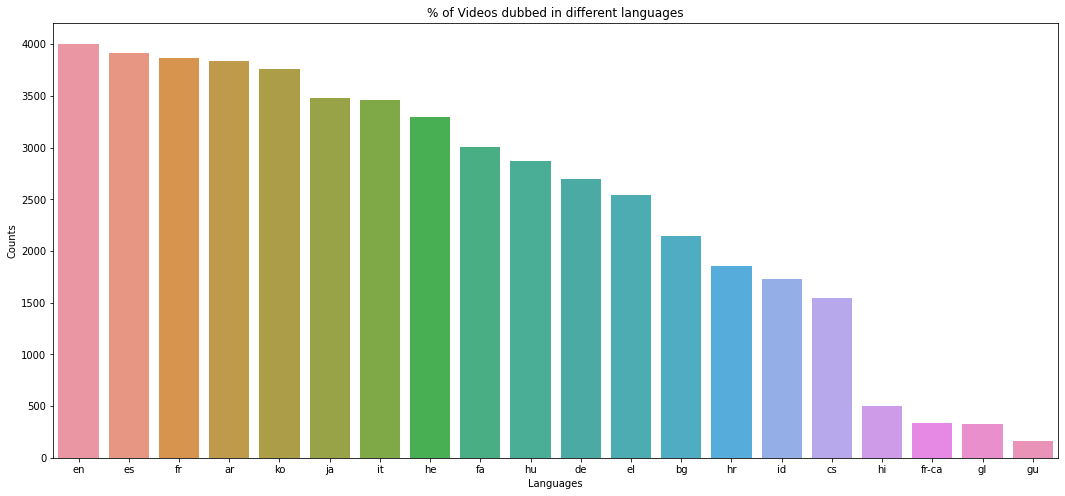

In [ ]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')



This graphs gives the idea about how many languages were available as subtitles for the videos. And again English comes in top as its the common language all over the worls.

#**topics column**

In [ ]:
tedtalk_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [ ]:
topics_df = pd.DataFrame(tedtalk_df['topics'].explode().value_counts().reset_index()).iloc[:,0:]
topics_df.rename(columns={'index':'Topics','topics':'Number_of_talks'},inplace=True)



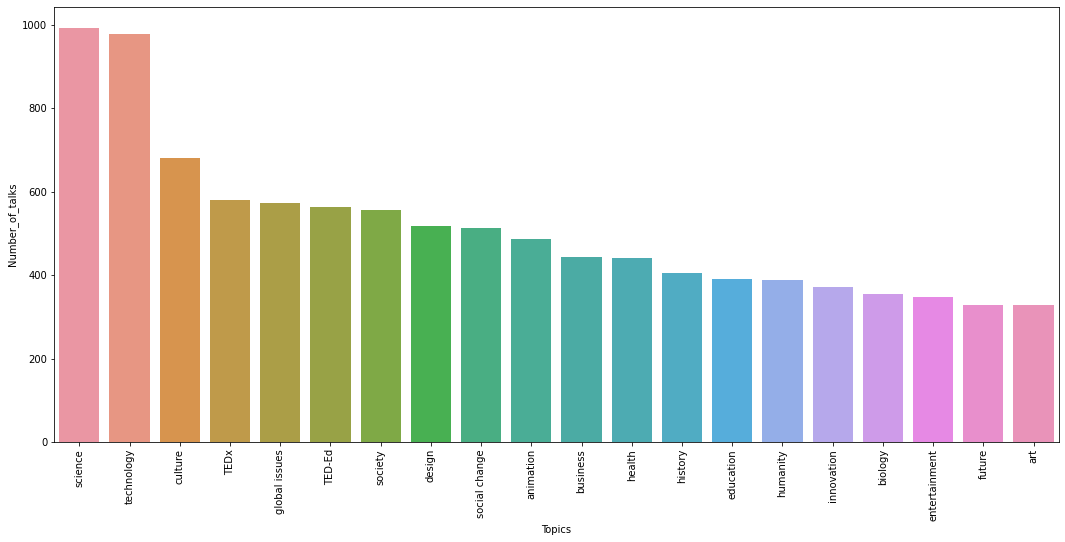

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Topics',y='Number_of_talks',data=topics_df.head(20))

We can see that the most talks in TED talk were about Science and technology.

##**Wordcloud for topics**

In [ ]:
from wordcloud import WordCloud
text = " ".join(topics_df['Topics'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'white').generate(text)

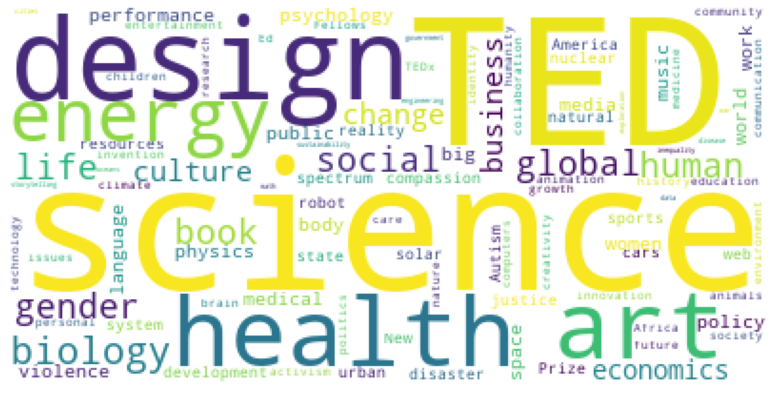

In [ ]:
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**description column** 

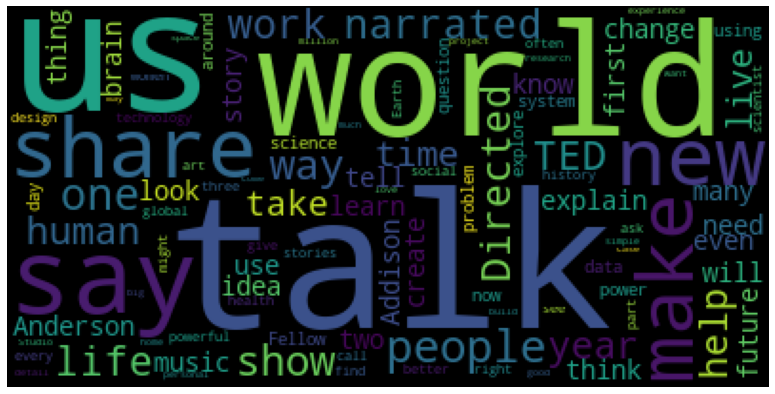

In [ ]:
text = " ".join(tedtalk_df['description'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'black').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**title column**

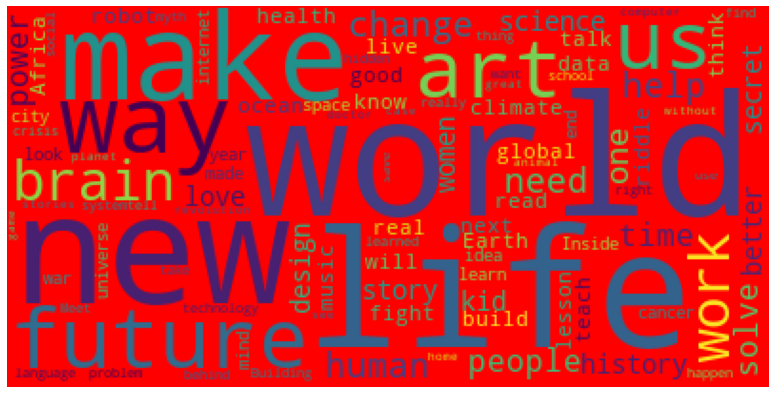

In [ ]:
text = " ".join(tedtalk_df['title'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'red').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**Heatmap**

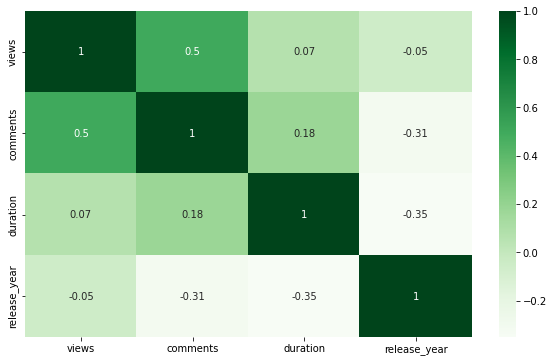

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(tedtalk_df.corr(),2),annot=True,cmap='Greens');

Trying to get a correlation matrix with visualization for the numeric columns. We can observe no 2 column share correlation more than 60%

In [ ]:
td_talk_df_2 = tedtalk_df.copy()